In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import time
from tqdm import tqdm
from IPython.display import display, clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import itertools

# --- Load and Preprocess Data ---
iris = pd.read_csv('C:/Users/Lenova/OneDrive/ML/iris.csv')
iris.rename(columns={'species Name': 'species'}, inplace=True)
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
print(iris.columns)

Index(['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)',
       'Petal width (cm)', 'species name'],
      dtype='object')


In [2]:
# --- Train Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- Train Neural Network Model ---
model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],), name="Hidden_Layer1"),
    keras.layers.Dense(8, activation='relu', name="Hidden_Layer2"),
    keras.layers.Dense(len(np.unique(y)), activation='softmax', name="Output_Layer")
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


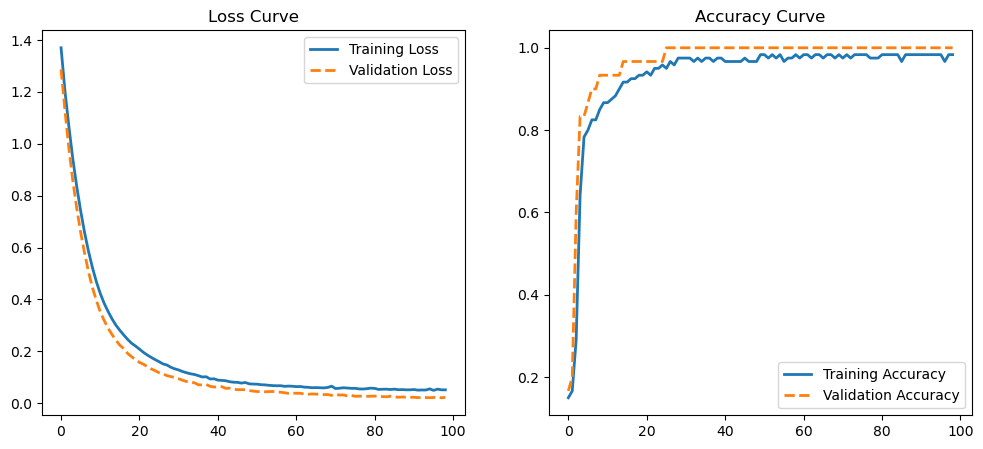

Training Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [01:36<00:00,  1.03it/s]


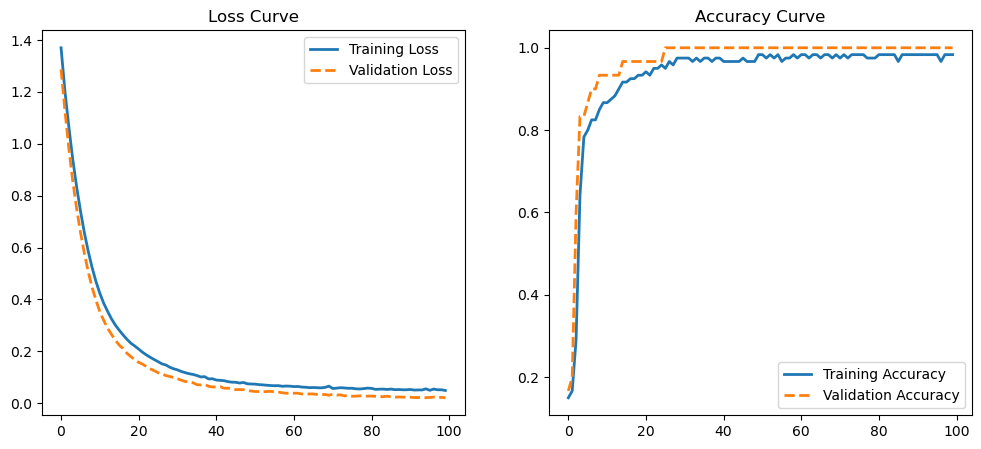

In [3]:
# --- Live Plot Setup ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
losses, val_losses, accuracies, val_accuracies = [], [], [], []

def live_update_plot():
    clear_output(wait=True)
    display(fig)
    ax[0].cla()
    ax[0].plot(losses, label='Training Loss', linewidth=2)
    ax[0].plot(val_losses, label='Validation Loss', linestyle='dashed', linewidth=2)
    ax[0].set_title("Loss Curve")
    ax[0].legend()
    ax[1].cla()
    ax[1].plot(accuracies, label='Training Accuracy', linewidth=2)
    ax[1].plot(val_accuracies, label='Validation Accuracy', linestyle='dashed', linewidth=2)
    ax[1].set_title("Accuracy Curve")
    ax[1].legend()
# --- Training Loop ---
epochs = 100
batch_size = 5
for epoch in tqdm(range(epochs), desc="Training Progress"):
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=1, verbose=0, validation_data=(X_test, y_test))
    losses.append(history.history['loss'][0])
    val_losses.append(history.history['val_loss'][0])
    accuracies.append(history.history['accuracy'][0])
    val_accuracies.append(history.history['val_accuracy'][0])
    live_update_plot()
    time.sleep(0.1)

In [4]:
# --- Evaluate Models ---
print("\nRandom Forest Model Evaluation:")
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

print("\nNeural Network Model Evaluation:")
y_pred_probs_nn = model.predict(X_test)
y_pred_nn = np.argmax(y_pred_probs_nn, axis=1)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nn) * 100:.2f}%")
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))

plt.show()


Random Forest Model Evaluation:
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Neural Network Model Evaluation:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [5]:
# --- Predict Species from User Input ---
def predict_species():
    print("\nEnter the flower measurements to predict the species:")
    sepal_length = float(input("Sepal Length (cm): "))
    sepal_width = float(input("Sepal Width (cm): "))
    petal_length = float(input("Petal Length (cm): "))
    petal_width = float(input("Petal Width (cm): "))

    input_data = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    input_data = scaler.transform(input_data)

    prediction_rf = rf_model.predict(input_data)
    predicted_species_rf = le.inverse_transform(prediction_rf)[0]
    print(f"Random Forest Prediction: {predicted_species_rf}")
    
    prediction_nn = model.predict(input_data)
    predicted_species_nn = le.inverse_transform([np.argmax(prediction_nn)])[0]
    print(f"Neural Network Prediction: {predicted_species_nn}")

predict_species()



Enter the flower measurements to predict the species:


Sepal Length (cm):  0.3
Sepal Width (cm):  0.5
Petal Length (cm):  1.4
Petal Width (cm):  1.5


Random Forest Prediction: Iris-setosa
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Neural Network Prediction: Iris-setosa


C:\Users\Lenova\AppData\Local\Temp\ipykernel_10424\1839264439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species name', data=iris, palette='viridis')


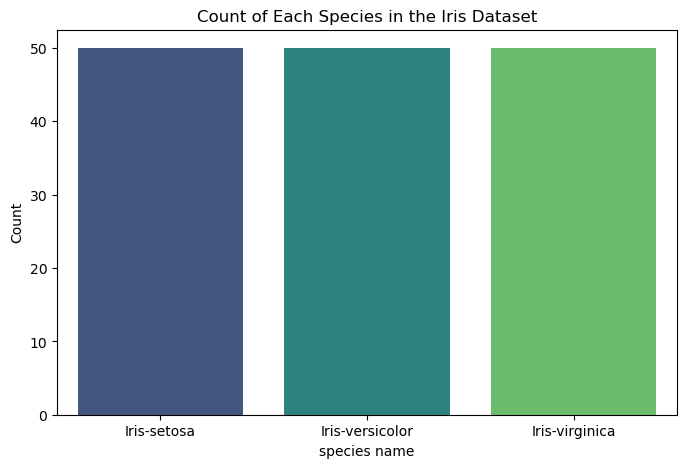

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='species name', data=iris, palette='viridis')
plt.title("Count of Each Species in the Iris Dataset")
plt.xlabel("species name")
plt.ylabel("Count")
plt.show()

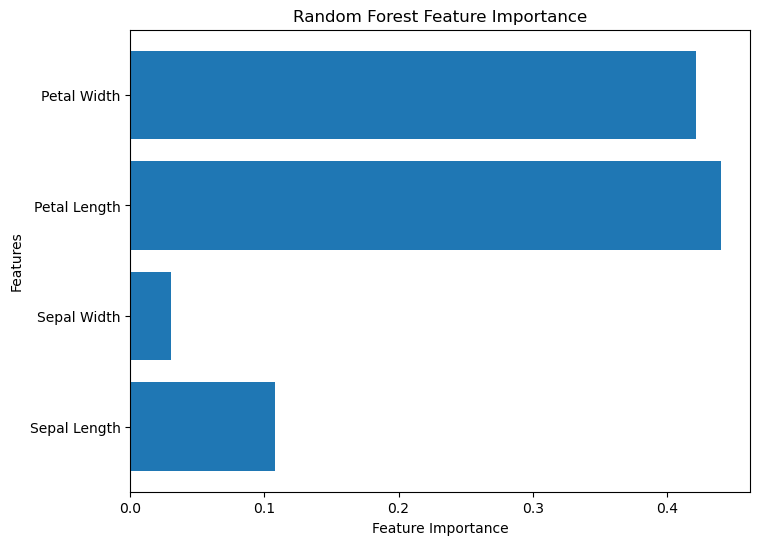

In [6]:
# --- Feature Importance (Random Forest) ---
plt.figure(figsize=(8, 6))
feature_importance = rf_model.feature_importances_
plt.barh(range(len(feature_importance)), feature_importance, tick_label=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()


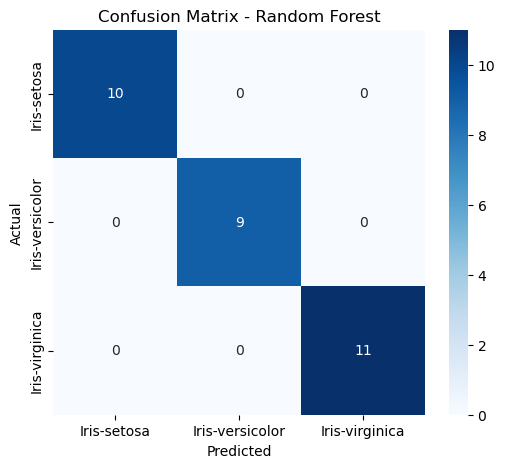

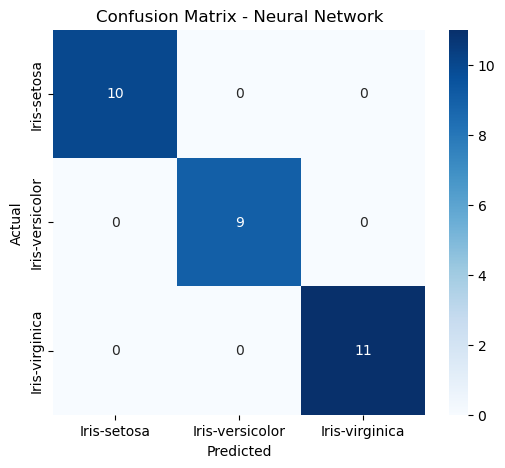

In [7]:
# --- Confusion Matrix Plot ---
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(confusion_matrix(y_test, y_pred_rf), "Confusion Matrix - Random Forest")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_nn), "Confusion Matrix - Neural Network")


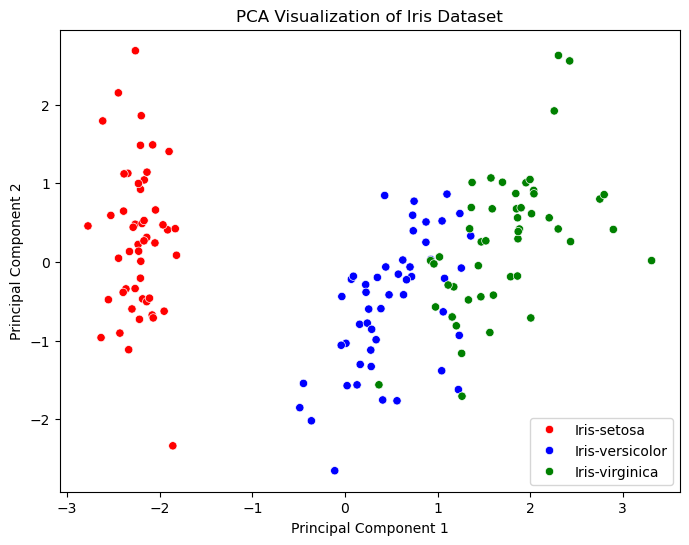

In [15]:
# --- PCA Visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Define color mapping
color_palette = {species: color for species, color in zip(le.classes_, ['red', 'blue', 'green'])}
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y), palette=color_palette)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Iris Dataset")
plt.legend()
plt.show()

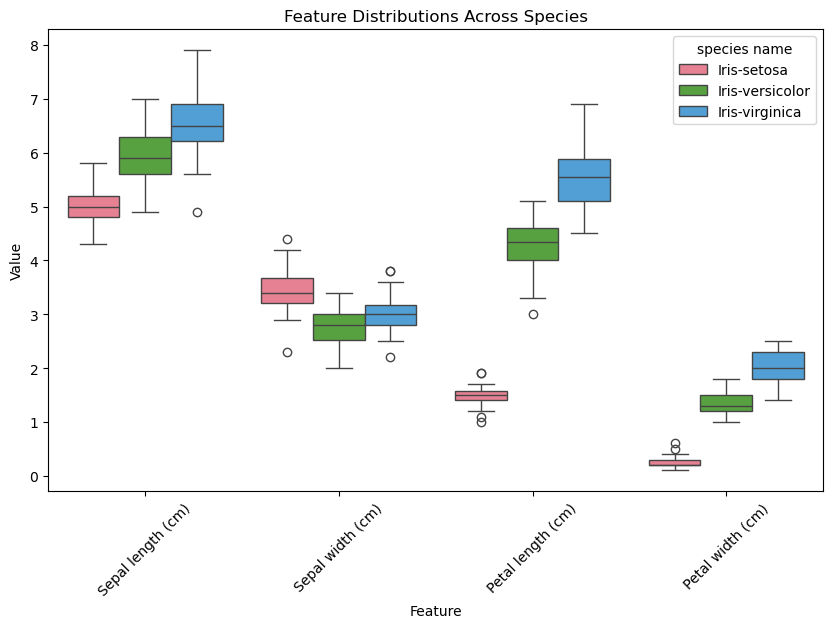

In [19]:

plt.figure(figsize=(10, 6))
iris_melted = iris.melt(id_vars='species name', var_name='Feature', value_name='Value')
sns.boxplot(x='Feature', y='Value', hue='species name', data=iris_melted, palette="husl")  # 'husl' generates distinct colors
plt.title("Feature Distributions Across Species")
plt.xticks(rotation=45)
plt.show()

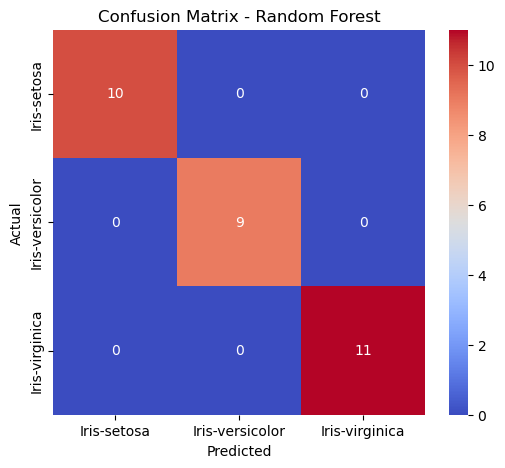

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix - Random Forest")
plt.show()


C:\Users\Lenova\AppData\Local\Temp\ipykernel_10424\3798693678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species name', y='Sepal length (cm)', data=iris, palette=['red', 'blue', 'green'])


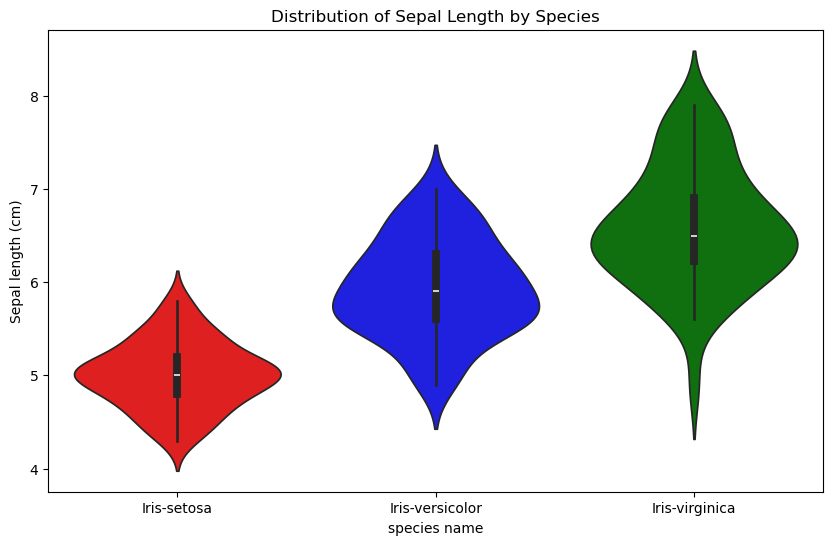

In [27]:
# Generate the Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='species name', y='Sepal length (cm)', data=iris, palette=['red', 'blue', 'green'])
plt.title("Distribution of Sepal Length by Species")
plt.show()

C:\Users\Lenova\AppData\Local\Temp\ipykernel_10424\3517764505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='species name', y='Sepal length (cm)', data=iris, palette='coolwarm')


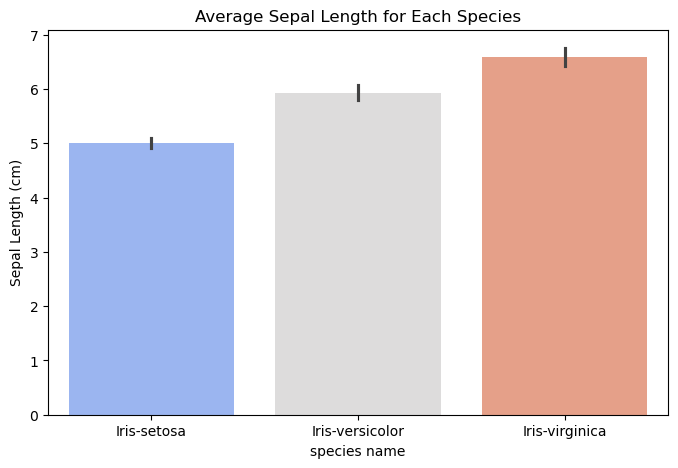

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x='species name', y='Sepal length (cm)', data=iris, palette='coolwarm')
plt.title("Average Sepal Length for Each Species")
plt.xlabel("species name")
plt.ylabel("Sepal Length (cm)")
plt.show()
